In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Danki_Tobias.evaluation import plot_statistics as ps
from Danki_Tobias.helper.environment_definitions import cripple_options_evaluation, cripple_options_training

data_type                     train_on       algorithm          name      
position                      non_crippled   normal             training_0    -6.074406
                                                                training_1    -5.692458
                                                                training_2    -7.090457
                                                                training_3    -6.377938
                                                                training_4    -7.385442
                                                                                ...    
position_and_velocity_deltas  multiple_envs  online_adaptation  eval_1        -3.319356
                                                                eval_2       -38.469876
                                                                eval_3        -3.562862
                                                                eval_4        -6.526452
                                             

In [24]:
data_type_options = ['position', 'position_deltas', 'position_and_velocity', 'position_and_velocity_deltas']
train_on_options = ['non_crippled', 'multiple_envs']
algorithms = ['normal', 'meta', 'online_adaptation']
names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5',
         'eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']
test_names = names[6:]
train_names = names[:6]

def read_average_reward(data_type, train_on, algorithm, name):
    file_name = f'../data/{data_type}/on_policy/trained_on_{train_on}/{algorithm}/evaluation_{name}.txt'
    with open(file_name, "r") as file:
        file.readline()
        file.readline()
        text = file.readline()
    _, average_reward = text.split("=")
    return float(average_reward)


def read_all_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    all_rewards = pd.Series(rewards, index=multi_index)
    return all_rewards

def read_test_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, test_names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in test_names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    test_rewards = pd.Series(rewards, index=multi_index)
    return test_rewards

def read_train_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, train_names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in train_names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    train_rewards = pd.Series(rewards, index=multi_index)
    return train_rewards

all_rewards = read_all_rewards()
test_rewards = read_test_rewards()
train_rewards = read_train_rewards()

Danki
-------------------------------------------------------------------------

In [4]:
# Load data
reward_normal = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'normal', :]
reward_meta = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'meta', :]
reward_online_adaptation = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'online_adaptation', :]

In [5]:
reward_normal_test = test_rewards['position_and_velocity_deltas', 'non_crippled', 'normal', :]
reward_meta_test = test_rewards['position_and_velocity_deltas', 'non_crippled', 'meta', :]
reward_online_adaptation_test = test_rewards['position_and_velocity_deltas', 'non_crippled', 'online_adaptation', :]


Models of three algorithms trained on non-crippled data.
Test of models of training time on non-crippled and crippled robots.

Side node:
normal==Model A==seagreen
adaptation==Model B==tomato
meta==Model C==royalblue

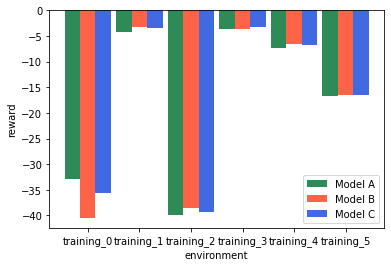

In [28]:
# draw parallel reward plot
bar_width = 0.3
index_normal = np.arange(len(train_names))
index_online_adaptation = index_normal + bar_width
index_meta = index_online_adaptation + bar_width

plt.bar(index_normal, height=reward_normal, width=bar_width, color='seagreen', label='Model A')
plt.bar(index_online_adaptation, height=reward_online_adaptation, width=bar_width, color='tomato', label='Model B')
plt.bar(index_meta, height=reward_meta, width=bar_width, color='royalblue', label='Model C')

plt.legend()
plt.xticks(index_normal + bar_width, train_names)
plt.xlabel('environment')
plt.ylabel('reward')

plt.savefig("../results/Danki/NonCrippledComparisonTrainingN", bbox_inches='tight')
plt.show()

Models of three algorithms trained on non-crippled data.
Tests of models of training time on non-crippled and crippled robots.

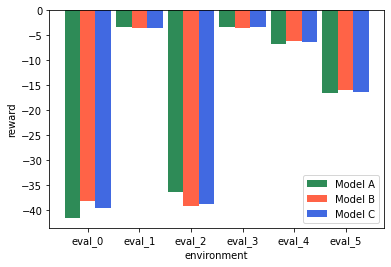

In [29]:
bar_width = 0.3

index_normal = np.arange(len(test_names))
index_online_adaptation = index_normal + bar_width
index_meta = index_online_adaptation + bar_width

plt.bar(index_normal, height=reward_normal_test, width=bar_width, color='seagreen', label='Model A')
plt.bar(index_online_adaptation, height=reward_online_adaptation_test, width=bar_width, color='tomato', label='Model B')
plt.bar(index_meta, height=reward_meta_test, width=bar_width, color='royalblue', label='Model C')

plt.legend()
plt.xticks(index_normal + bar_width, test_names)
plt.ylabel('reward')
plt.xlabel('environment')

plt.savefig("../results/Danki/NonCrippledComparisonTestingN", bbox_inches='tight')
plt.show()

Models trained on non-crippled data and multi-environment -> same algorithm different model performance comparison

1. normal algorithm

In [42]:
# Load data

# normal
normal1 = train_rewards['position_and_velocity_deltas', 'non_crippled', 'normal', :]
normal2 = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'normal', :]

# meta
meta1 = train_rewards['position_and_velocity_deltas', 'non_crippled', 'meta', :]
meta2 = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'meta', :]

# adaptation
adaptation1 = train_rewards['position_and_velocity_deltas', 'non_crippled', 'online_adaptation', :]
adaptation2 = train_rewards['position_and_velocity_deltas', 'multiple_envs', 'online_adaptation', :]

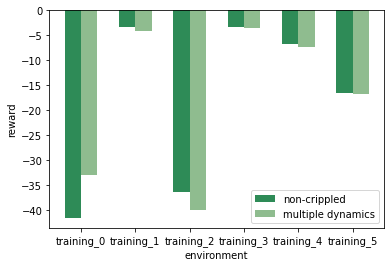

In [46]:
bar_width = 0.3
index_normal1 = np.arange(len(train_names))
index_normal2 = index_normal + bar_width

plt.bar(index_normal1, height=normal1, width=bar_width, color='seagreen', label='non-crippled')
plt.bar(index_normal2, height=normal2, width=bar_width, color='darkseagreen', label='multiple dynamics')

plt.legend()
plt.xticks(index_normal + 0.5 * bar_width, train_names)
plt.ylabel('reward')
plt.xlabel('environment')

plt.savefig("../results/Danki/NormalNonAndMultinTrainingN", bbox_inches='tight')
plt.show()

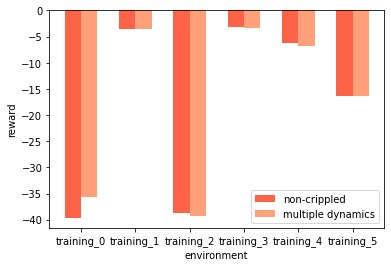

In [47]:
# meta == Model C
bar_width = 0.3
index_normal1 = np.arange(len(train_names))
index_normal2 = index_normal + bar_width

plt.bar(index_normal1, height=meta1, width=bar_width, color='tomato', label='non-crippled')
plt.bar(index_normal2, height=meta2, width=bar_width, color='lightsalmon', label='multiple dynamics')

plt.legend()
plt.xticks(index_normal + 0.5 * bar_width, train_names)
plt.ylabel('reward')
plt.xlabel('environment')

plt.savefig("../results/Danki/MetaNonAndMultinTrainingN", bbox_inches='tight')
plt.show()

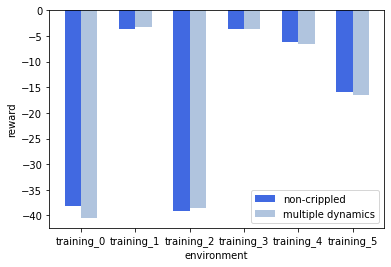

In [48]:
# adaptation == Model B
bar_width = 0.3
index_normal1 = np.arange(len(train_names))
index_normal2 = index_normal + bar_width

plt.bar(index_normal1, height=adaptation1, width=bar_width, color='royalblue', label='non-crippled')
plt.bar(index_normal2, height=adaptation2, width=bar_width, color='lightsteelblue', label='multiple dynamics')

plt.legend()
plt.xticks(index_normal + 0.5 * bar_width, train_names)
plt.ylabel('reward')
plt.xlabel('environment')

plt.savefig("../results/Danki/adaptNonAndMultinTrainingN", bbox_inches='tight')
plt.show()